In [5]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt

import kagglegym

import seaborn as sns
%matplotlib inline
p = sns.color_palette()

In [6]:
# This part is going to be for explorind the dataset ...
# so we want the entire dataset ..
with pd.HDFStore("../input/train.h5", "r") as train:
    df = train.get("train")

In [7]:
dfId = df[['id', 'timestamp', 'y']].groupby('id').agg([
                    np.min, np.max, len, 
                lambda m: np.log(1+m).sum() ]  ).reset_index()
#dfId.sort_values([('timestamp', 'amax')], inplace=True, ascending=False)
dfId.sort_values([('timestamp','len')], inplace=True, ascending=True)
print(dfId.head(20))
print(dfId['y'].columns)

        id timestamp                               y                          
                amin  amax len    <lambda>      amin      amax   len  <lambda>
816   1229      1811  1812   2   15.004925 -0.004548  0.011912   2.0  0.007283
1253  1893      1085  1086   2   13.981434 -0.004767  0.004763   2.0 -0.000027
289    435      1811  1812   2   15.004925 -0.005728  0.002534   2.0 -0.003214
703   1056      1188  1195   8   56.670444 -0.038950  0.012808   8.0 -0.041246
648    980      1698  1709  12   89.292297 -0.016571  0.023424  12.0  0.012666
875   1314         0    11  12   19.987215 -0.008315  0.014522  12.0  0.038838
569    861      1799  1812  14  104.988014 -0.015618  0.033756  14.0  0.042321
1004  1506      1799  1812  14  104.988014 -0.015530  0.038231  14.0  0.019441
726   1089      1391  1404  14  101.404114 -0.021448  0.054956  14.0  0.147029
880   1320      1799  1812  14  104.988014 -0.032463  0.027734  14.0 -0.005145
1138  1726      1799  1812  14  104.988014 -0.023926

In [10]:
dfId.describe()

id    timestamp                                          \
                           amin         amax          len      <lambda>   
count  1424.000000  1424.000000  1424.000000  1424.000000   1424.000000   
mean   1074.492978   415.474017  1617.256320  1201.373596   7904.716456   
std     621.613221   594.394072   427.235347   646.399878   4197.083929   
min       0.000000     0.000000    11.000000     2.000000     13.981434   
25%     544.500000     0.000000  1812.000000   571.250000   3840.141846   
50%    1066.500000     0.000000  1812.000000  1485.000000   9966.346680   
75%    1610.250000   881.000000  1812.000000  1813.000000  11794.134766   
max    2158.000000  1811.000000  1812.000000  1813.000000  11794.134766   

                 y                                         
              amin         amax          len     <lambda>  
count  1424.000000  1424.000000  1424.000000  1424.000000  
mean     -0.081078     0.088849  1201.373535    -0.035028  
std       0.013418     0.013729   646.398621     0.858887  
min      -0.086094     0.002534     2.000000    -5.153477  
25%      -0.086094     0.093498   571.250000    -0.276841  
50%      -0.086094     0.093498  1485.000000     0.088488  
75%      -0.086094     0.093498  1813.000000     0.443105  
max      -0.003894     0.093498  1813.000000     3.034892

In [11]:
df['y'].describe()

count    1.710756e+06
mean     2.217509e-04
std      2.240643e-02
min     -8.609413e-02
25%     -9.561389e-03
50%     -1.570681e-04
75%      9.520990e-03
max      9.349781e-02
Name: y, dtype: float64

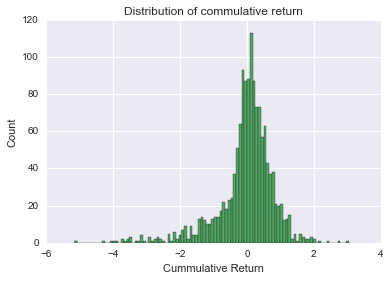

In [25]:
y = dfId['y','<lambda>'].values
plt.hist(y, bins=100, color=p[1])
plt.xlabel('Cummulative Return')
plt.ylabel('Count')
plt.title('Distribution of commulative return')

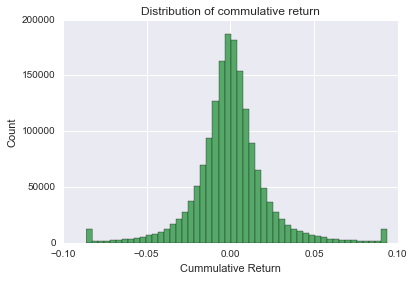

In [21]:
y = df['y'].values
plt.hist(y, bins=50, color=p[1])
plt.xlabel('Cummulative Return')
plt.ylabel('Count')
plt.title('Distribution of commulative return')

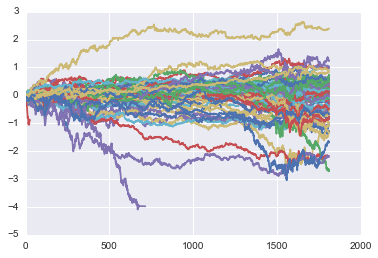

In [35]:
for i, (idVal, dfG) in enumerate(df[['id', 'timestamp', 'y']].groupby('id')):
    #if i> 100: break
    if i not in dfId
    #print(dfG.head())
    df1 = dfG[['timestamp', 'y']].groupby('timestamp').agg(np.mean).reset_index()
    plt.plot(df1['timestamp'], np.log(1+df1['y']).cumsum(),label='%d'%idVal)
    #plt.legend()

In [18]:
dfId['id']

1229
1893
435
1056
980
1314
861
1506
1089
1320
1726
882
1809
752
2063
546
173
767
2076
1699
277
1276
1265
226
1906
1193
93
1431
1343
1323
308
454
316
940
1515
111
1489
1606
1986
1069
2111
103
1151
62
303
538
1550
824
891
280
1083
1477
1002
169
105
941
1885
1047
737
872
994
610
1427
1614
884
683
1523
663
888
808
1598
10
1755
705
1629
780
412
1172
1313
1012
1118
783
214
131
575
2158
1568
281
369
27
1465
1095
1354
576
1737
379
462
993
1000
382
1311
439
1010
357
72
1184
653
1243
760
158
2152
1392
2029
2058
807
1778
1866
102
306
990
286
978
1223
1257
1552
819
1142
1840
622
1166
1357
585
64
1795
1793
1377
258
1787
1239
2098
1877
404
364
982
1861
1864
1213
758
325
324
14
18
23
1008
32
791
1822
298
295
1021
461
866
1650
1457
1277
134
1454
1690
1474
1290
1712
570
220
573
222
127
1039
1442
858
856
1094
812
502
1637
889
104
984
802
2086
63
1695
983
864
58
641
698
966
1888
776
1916
875
805
470
1785
1380
1385
440
652
1833
374
1654
592
1604
1555
842
1413
1436
561
403
870
841
399
1541
724
970
533
843